In [1]:
import pandas as pd
import requests

# 1 - Extraccion de Datos (Primera llamada )

In [2]:
url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"

# Utilizando el método request pasamosla url y guardamos la respuesta en una variable 

res = requests.get(url)
res.status_code


200

In [3]:
res_api = res.json()
res_api

{'data': {'type': 'Evolución de la demanda',
  'id': 'dem1',
  'attributes': {'title': 'Evolución de la demanda',
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2023-07-16T11:45:21'}}},
 'included': [{'type': 'Demanda',
   'id': '10297',
   'groupId': None,
   'attributes': {'title': 'Demanda',
    'description': None,
    'color': '#ffea00',
    'type': None,
    'magnitude': None,
    'composite': False,
    'last-update': '2021-01-12T10:19:24.000+01:00',
    'values': [{'value': 574776.72,
      'percentage': 1,
      'datetime': '2020-01-01T00:00:00.000+01:00'},
     {'value': 723522.375,
      'percentage': 1,
      'datetime': '2020-01-02T00:00:00.000+01:00'},
     {'value': 754645.342,
      'percentage': 1,
      'datetime': '2020-01-03T00:00:00.000+01:00'},
     {'value': 702390.878,
      'percentage': 1,
      'datetime': '2020-01-04T00:00:00.000+01:00'},
     {'value': 651967.486,
   

In [4]:
# typo de objeto 
type(res_api) 

dict

In [5]:
# Para ver lo que nos devuelve el response lo mas efectivo es analizar las claves del diccionario 
res_api.keys()

dict_keys(['data', 'included'])

In [6]:
# RESUMEN de extraccion de datos en FUNCION
def get_api(url):
    res = requests.get(url)
    if res.status_code == 200:
        return res.json()
    else:
        return f"Error {res.status_code}"


url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"
get_api(url)

{'data': {'type': 'Evolución de la demanda',
  'id': 'dem1',
  'attributes': {'title': 'Evolución de la demanda',
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2023-07-16T11:45:21'}}},
 'included': [{'type': 'Demanda',
   'id': '10297',
   'groupId': None,
   'attributes': {'title': 'Demanda',
    'description': None,
    'color': '#ffea00',
    'type': None,
    'magnitude': None,
    'composite': False,
    'last-update': '2021-01-12T10:19:24.000+01:00',
    'values': [{'value': 574776.72,
      'percentage': 1,
      'datetime': '2020-01-01T00:00:00.000+01:00'},
     {'value': 723522.375,
      'percentage': 1,
      'datetime': '2020-01-02T00:00:00.000+01:00'},
     {'value': 754645.342,
      'percentage': 1,
      'datetime': '2020-01-03T00:00:00.000+01:00'},
     {'value': 702390.878,
      'percentage': 1,
      'datetime': '2020-01-04T00:00:00.000+01:00'},
     {'value': 651967.486,
   

In [7]:
# HACIENDO EL BOBO 
import requests
from PIL import Image
from io import BytesIO

def cargar_imagen_desde_url(michi):
    # Realizar la solicitud HTTP para obtener la imagen
    response = requests.get(f"https://http.cat/images/{michi}.jpg")

    # Verificar si la solicitud fue exitosa (código de estado 200)
    if response.status_code == 200:
        # Obtener el contenido de la imagen en bytes
        image_data = response.content

        # Crear un objeto Image a partir de los datos de la imagen
        image = Image.open(BytesIO(image_data))
        
        return image
    else:
        print('Error al cargar la imagen:', response.status_code)
        return None

# RESUMEN en FUNCION
def get_api(url):
    res = requests.get(url)
    if res.status_code == 200:
        gatete = cargar_imagen_desde_url(res.status_code)
        gatete.show()
        return res.json()
    else:
        cargar_imagen_desde_url(res.status_code)
        return f"Error {res.status_code}"


url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"
get_api(url)


{'data': {'type': 'Evolución de la demanda',
  'id': 'dem1',
  'attributes': {'title': 'Evolución de la demanda',
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2023-07-16T11:45:21'}}},
 'included': [{'type': 'Demanda',
   'id': '10297',
   'groupId': None,
   'attributes': {'title': 'Demanda',
    'description': None,
    'color': '#ffea00',
    'type': None,
    'magnitude': None,
    'composite': False,
    'last-update': '2021-01-12T10:19:24.000+01:00',
    'values': [{'value': 574776.72,
      'percentage': 1,
      'datetime': '2020-01-01T00:00:00.000+01:00'},
     {'value': 723522.375,
      'percentage': 1,
      'datetime': '2020-01-02T00:00:00.000+01:00'},
     {'value': 754645.342,
      'percentage': 1,
      'datetime': '2020-01-03T00:00:00.000+01:00'},
     {'value': 702390.878,
      'percentage': 1,
      'datetime': '2020-01-04T00:00:00.000+01:00'},
     {'value': 651967.486,
   

# 2 - Transformacion

## 2.1 - Analisis del response

Un json no deja de ser un diccionario. Para ver lo que nos devuelve el response lo mas efectivo es analizar las claves del diccionario

In [8]:
# data indica informacion referida a los metadatos que nos devuelve la API
res_api["data"]

{'type': 'Evolución de la demanda',
 'id': 'dem1',
 'attributes': {'title': 'Evolución de la demanda',
  'last-update': '2021-01-12T10:19:24.000+01:00',
  'description': None},
 'meta': {'cache-control': {'cache': 'HIT',
   'expireAt': '2023-07-16T11:45:21'}}}

In [9]:
# included es una lista de diccionarios.
# included indica informacion referida a los datos que nos devuelve la API. Aqui estan los datos que necesitamos.  
res_api["included"]


[{'type': 'Demanda',
  'id': '10297',
  'groupId': None,
  'attributes': {'title': 'Demanda',
   'description': None,
   'color': '#ffea00',
   'type': None,
   'magnitude': None,
   'composite': False,
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'values': [{'value': 574776.72,
     'percentage': 1,
     'datetime': '2020-01-01T00:00:00.000+01:00'},
    {'value': 723522.375,
     'percentage': 1,
     'datetime': '2020-01-02T00:00:00.000+01:00'},
    {'value': 754645.342,
     'percentage': 1,
     'datetime': '2020-01-03T00:00:00.000+01:00'},
    {'value': 702390.878,
     'percentage': 1,
     'datetime': '2020-01-04T00:00:00.000+01:00'},
    {'value': 651967.486,
     'percentage': 1,
     'datetime': '2020-01-05T00:00:00.000+01:00'},
    {'value': 630259.532,
     'percentage': 1,
     'datetime': '2020-01-06T00:00:00.000+01:00'},
    {'value': 789031.621,
     'percentage': 1,
     'datetime': '2020-01-07T00:00:00.000+01:00'},
    {'value': 820143.678,
     'percentage':

In [10]:
# numero de elementos dentro de la lista  
len(res_api["included"])

1

In [11]:
# accedemos al unico elemento de la lista 
res_api["included"][0]

{'type': 'Demanda',
 'id': '10297',
 'groupId': None,
 'attributes': {'title': 'Demanda',
  'description': None,
  'color': '#ffea00',
  'type': None,
  'magnitude': None,
  'composite': False,
  'last-update': '2021-01-12T10:19:24.000+01:00',
  'values': [{'value': 574776.72,
    'percentage': 1,
    'datetime': '2020-01-01T00:00:00.000+01:00'},
   {'value': 723522.375,
    'percentage': 1,
    'datetime': '2020-01-02T00:00:00.000+01:00'},
   {'value': 754645.342,
    'percentage': 1,
    'datetime': '2020-01-03T00:00:00.000+01:00'},
   {'value': 702390.878,
    'percentage': 1,
    'datetime': '2020-01-04T00:00:00.000+01:00'},
   {'value': 651967.486,
    'percentage': 1,
    'datetime': '2020-01-05T00:00:00.000+01:00'},
   {'value': 630259.532,
    'percentage': 1,
    'datetime': '2020-01-06T00:00:00.000+01:00'},
   {'value': 789031.621,
    'percentage': 1,
    'datetime': '2020-01-07T00:00:00.000+01:00'},
   {'value': 820143.678,
    'percentage': 1,
    'datetime': '2020-01-08T0

In [12]:
# analizamos el tipo de objeto
type(res_api["included"][0])

dict

In [13]:
# analizamos las claves del diccionario 
res_api["included"][0].keys()

dict_keys(['type', 'id', 'groupId', 'attributes'])

In [15]:
# observamos que la clave attributes contiene los datos que necesitamos
res_api["included"][0]['attributes']


{'title': 'Demanda',
 'description': None,
 'color': '#ffea00',
 'type': None,
 'magnitude': None,
 'composite': False,
 'last-update': '2021-01-12T10:19:24.000+01:00',
 'values': [{'value': 574776.72,
   'percentage': 1,
   'datetime': '2020-01-01T00:00:00.000+01:00'},
  {'value': 723522.375,
   'percentage': 1,
   'datetime': '2020-01-02T00:00:00.000+01:00'},
  {'value': 754645.342,
   'percentage': 1,
   'datetime': '2020-01-03T00:00:00.000+01:00'},
  {'value': 702390.878,
   'percentage': 1,
   'datetime': '2020-01-04T00:00:00.000+01:00'},
  {'value': 651967.486,
   'percentage': 1,
   'datetime': '2020-01-05T00:00:00.000+01:00'},
  {'value': 630259.532,
   'percentage': 1,
   'datetime': '2020-01-06T00:00:00.000+01:00'},
  {'value': 789031.621,
   'percentage': 1,
   'datetime': '2020-01-07T00:00:00.000+01:00'},
  {'value': 820143.678,
   'percentage': 1,
   'datetime': '2020-01-08T00:00:00.000+01:00'},
  {'value': 820769.614,
   'percentage': 1,
   'datetime': '2020-01-09T00:00:0

In [16]:
# analizamos las claves del diccionario 

res_api["included"][0]['attributes'].keys()


dict_keys(['title', 'description', 'color', 'type', 'magnitude', 'composite', 'last-update', 'values'])

In [17]:
# en este caso observamos que la clave values contiene los datos que necesitamos
res_api["included"][0]['attributes']['values']

[{'value': 574776.72,
  'percentage': 1,
  'datetime': '2020-01-01T00:00:00.000+01:00'},
 {'value': 723522.375,
  'percentage': 1,
  'datetime': '2020-01-02T00:00:00.000+01:00'},
 {'value': 754645.342,
  'percentage': 1,
  'datetime': '2020-01-03T00:00:00.000+01:00'},
 {'value': 702390.878,
  'percentage': 1,
  'datetime': '2020-01-04T00:00:00.000+01:00'},
 {'value': 651967.486,
  'percentage': 1,
  'datetime': '2020-01-05T00:00:00.000+01:00'},
 {'value': 630259.532,
  'percentage': 1,
  'datetime': '2020-01-06T00:00:00.000+01:00'},
 {'value': 789031.621,
  'percentage': 1,
  'datetime': '2020-01-07T00:00:00.000+01:00'},
 {'value': 820143.678,
  'percentage': 1,
  'datetime': '2020-01-08T00:00:00.000+01:00'},
 {'value': 820769.614,
  'percentage': 1,
  'datetime': '2020-01-09T00:00:00.000+01:00'},
 {'value': 814759.827,
  'percentage': 1,
  'datetime': '2020-01-10T00:00:00.000+01:00'},
 {'value': 732531.725,
  'percentage': 1,
  'datetime': '2020-01-11T00:00:00.000+01:00'},
 {'value': 

In [18]:
# analizamos el tipo de objeto
type(res_api["included"][0]['attributes']['values']) 

list

In [19]:
# numero de elementos dentro de la lista  
len(res_api["included"][0]['attributes']['values'])

366

In [20]:

# creamos un objeto con los datos que necesitamos 
valores_response = res_api["included"][0]["attributes"]["values"]
valores_response


[{'value': 574776.72,
  'percentage': 1,
  'datetime': '2020-01-01T00:00:00.000+01:00'},
 {'value': 723522.375,
  'percentage': 1,
  'datetime': '2020-01-02T00:00:00.000+01:00'},
 {'value': 754645.342,
  'percentage': 1,
  'datetime': '2020-01-03T00:00:00.000+01:00'},
 {'value': 702390.878,
  'percentage': 1,
  'datetime': '2020-01-04T00:00:00.000+01:00'},
 {'value': 651967.486,
  'percentage': 1,
  'datetime': '2020-01-05T00:00:00.000+01:00'},
 {'value': 630259.532,
  'percentage': 1,
  'datetime': '2020-01-06T00:00:00.000+01:00'},
 {'value': 789031.621,
  'percentage': 1,
  'datetime': '2020-01-07T00:00:00.000+01:00'},
 {'value': 820143.678,
  'percentage': 1,
  'datetime': '2020-01-08T00:00:00.000+01:00'},
 {'value': 820769.614,
  'percentage': 1,
  'datetime': '2020-01-09T00:00:00.000+01:00'},
 {'value': 814759.827,
  'percentage': 1,
  'datetime': '2020-01-10T00:00:00.000+01:00'},
 {'value': 732531.725,
  'percentage': 1,
  'datetime': '2020-01-11T00:00:00.000+01:00'},
 {'value': 

## 2.2 - Transformacion de los datos de un diccionario 

In [21]:
# analizamos el tipo de objeto de la variable valores_response

type(valores_response)

list

In [22]:
# miramos el numero de elemntos de la lista valores_response 
len(valores_response)

366

In [29]:
# Analizamos los 3 primeros objetos de la lista valores_response
valores_response[:3]

[{'value': 574776.72,
  'percentage': 1,
  'datetime': '2020-01-01T00:00:00.000+01:00'},
 {'value': 723522.375,
  'percentage': 1,
  'datetime': '2020-01-02T00:00:00.000+01:00'},
 {'value': 754645.342,
  'percentage': 1,
  'datetime': '2020-01-03T00:00:00.000+01:00'}]

In [30]:
# Prueba de edicion del nombrtado de las keys de un diccionario 
# queremos cambiar el nombre de la clave datetime por fecha y value por demanda 
diccionario_limpio_prueba = valores_response[0].copy() # copiamos el primer elemento de la lista valores_response para no "ensuciar" el original
diccionario_limpio_prueba["demanda"] = diccionario_limpio_prueba.pop("value") # cambiamos el nombre de la clave value por demanda
diccionario_limpio_prueba # observamos que el diccionario ha cambiado el nombre de las claves datetime y value por fecha y demanda respectivamente


{'percentage': 1,
 'datetime': '2020-01-01T00:00:00.000+01:00',
 'demanda': 574776.72}

In [31]:
# Prueba de eliminacion de un elemento de un diccionario utilizamos el metodo pop 
diccionario_limpio_prueba.pop("percentage") # eliminamos la clave percentage del diccionario 
diccionario_limpio_prueba # observamos que el diccionario ha perdido la clave percentage

{'datetime': '2020-01-01T00:00:00.000+01:00', 'demanda': 574776.72}

In [32]:
# prueba para agregar una nueva key a un diccionario
recordatorio_diccionario = {'clave1': 100, 'clave2': 200}
recordatorio_diccionario['clave3'] = 300

print(recordatorio_diccionario)

{'clave1': 100, 'clave2': 200, 'clave3': 300}


In [33]:
# transformacion de la fecha en bruto a ano mes y dia 

fecha_completa = diccionario_limpio_prueba['datetime']
print(f"Fecha en bruto {fecha_completa}")

# como es una cadena de texto podemos quedarnos con los 4 primeros caracteres 
ano = fecha_completa[:4]
print(f"año {ano}")
 
mes = fecha_completa[5:7]
print(f"mes {mes}")

dia = fecha_completa[8:10]
print(f"dia {dia}")


# creamos una nueva clave en el diccionario con los anos meses y dias
diccionario_limpio_prueba["ano"] = ano
diccionario_limpio_prueba["mes"] = mes
diccionario_limpio_prueba["dia"] = dia

 # observamos que el diccionario ha cambiado el nombre de las claves datetime y value por fecha y demanda respectivamente
diccionario_limpio_prueba

Fecha en bruto 2020-01-01T00:00:00.000+01:00
año 2020
mes 01
dia 01


{'datetime': '2020-01-01T00:00:00.000+01:00',
 'demanda': 574776.72,
 'ano': '2020',
 'mes': '01',
 'dia': '01'}

In [42]:
# transforamcion de la fecha para formatear la fecha y obtener el nombre del día de la semana, el mes y el año
from datetime import datetime


# seleccionamos los 10 primeros caracteres de la cadena de texto que contiene la fecha 
fecha_completa = diccionario_limpio_prueba['datetime'][:10]
print(f"Fecha completa {fecha_completa}")


# transformamos la cadena de texto en un objeto datetime 
fecha_completa = datetime.strptime(fecha_completa, '%Y-%m-%d')

# formateamos la fecha completa para obtener el año
ano = fecha_completa.strftime('%Y')
print(f"Ano {ano}")

# formateamos la fecha completa para obtener el mes 
mes = fecha_completa.strftime('%m')
print(f"mes {mes}")

# formateamos la fecha completa para obtener el dia
dia = fecha_completa.strftime('%d')
print(f"dia {dia}")

# formateamos la fecha completa para obtener el nombre del dia de la semana 
dia_semana = fecha_completa.strftime('%A')
print(f"Dia de la semana {dia_semana}")


# creamos una nueva clave en el diccionario con los anos meses ,dias y dia de la semana
diccionario_limpio_prueba["ano"] = ano
diccionario_limpio_prueba["mes"] = mes
diccionario_limpio_prueba["dia"] = dia
diccionario_limpio_prueba["dia_semana"] = dia


diccionario_limpio_prueba


Fecha completa 2020-01-01
Ano 2020
mes 01
dia 01
Dia de la semana Wednesday


{'datetime': '2020-01-01T00:00:00.000+01:00',
 'demanda': 574776.72,
 'ano': '2020',
 'mes': '01',
 'dia': '01',
 'dia_semana': '01'}

In [50]:
# FUNCION // RESUMEN de limpieza de datos en este dicionario concreto 
def limpiar_diccionario(diccionario):
    fecha_completa = diccionario['datetime'][:10]


    fecha_datetime = datetime.strptime(fecha_completa, '%Y-%m-%d')

    ano = fecha_datetime.strftime('%Y')
    mes = fecha_datetime.strftime('%m')
    dia = fecha_datetime.strftime('%d')
    dia_semana = fecha_datetime.strftime('%A')


    # creamos una nueva clave en el diccionario con los anos meses ,dias y dia de la semana
    diccionario["fecha"] = fecha_completa
    diccionario["ano"] = ano
    diccionario["mes"] = mes
    diccionario["dia"] = dia
    diccionario["dia_semana"] = dia_semana


    diccionario["demanda"] = diccionario.pop("value") # cambiamos el nombre de la clave value por demanda
    diccionario.pop("percentage") # eliminamos la clave percentage del diccionario 
    diccionario.pop("datetime")     #eliminamos la clave datetime del diccionario 


    return diccionario

dicc = valores_response[0].copy() 
limpiar_diccionario(dicc)

{'fecha': '2020-01-01',
 'ano': '2020',
 'mes': '01',
 'dia': '01',
 'dia_semana': 'Wednesday',
 'demanda': 574776.72}

Ahora que lo tenemos para un solo elemento lo escalamos para todos elementos de nuestro diccionario

In [51]:
for valor in valores_response:
    limpiar_diccionario(valor)
valores_response

[{'fecha': '2020-01-01',
  'ano': '2020',
  'mes': '01',
  'dia': '01',
  'dia_semana': 'Wednesday',
  'demanda': 574776.72},
 {'fecha': '2020-01-02',
  'ano': '2020',
  'mes': '01',
  'dia': '02',
  'dia_semana': 'Thursday',
  'demanda': 723522.375},
 {'fecha': '2020-01-03',
  'ano': '2020',
  'mes': '01',
  'dia': '03',
  'dia_semana': 'Friday',
  'demanda': 754645.342},
 {'fecha': '2020-01-04',
  'ano': '2020',
  'mes': '01',
  'dia': '04',
  'dia_semana': 'Saturday',
  'demanda': 702390.878},
 {'fecha': '2020-01-05',
  'ano': '2020',
  'mes': '01',
  'dia': '05',
  'dia_semana': 'Sunday',
  'demanda': 651967.486},
 {'fecha': '2020-01-06',
  'ano': '2020',
  'mes': '01',
  'dia': '06',
  'dia_semana': 'Monday',
  'demanda': 630259.532},
 {'fecha': '2020-01-07',
  'ano': '2020',
  'mes': '01',
  'dia': '07',
  'dia_semana': 'Tuesday',
  'demanda': 789031.621},
 {'fecha': '2020-01-08',
  'ano': '2020',
  'mes': '01',
  'dia': '08',
  'dia_semana': 'Wednesday',
  'demanda': 820143.678}

# RESUMEN

El siguiente script realiza una llamada a una API, obtiene los datos de respuesta en formato JSON y realiza algunas modificaciones en los diccionarios obtenidos. La función get_api(url) es utilizada para obtener los datos de la API, y la función limpiar_diccionario(diccionario) se utiliza para modificar los diccionarios resultantes.






In [53]:
# Funciones 

# funcion para hacer la llamada a la API
def get_api(url):
    """
    Realiza una solicitud HTTP GET a una API utilizando la libreria requests. 
    Si la respuesta tiene un código de estado 200 (éxito), la función devuelve los 
    datos de la respuesta en formato JSON; de lo contrario, devuelve un mensaje 
    de error con el código de estado.

    Args:
        url (str): Endpoint de la API a la que se realiza la solicitud. 

    Returns:
        dict o str: datos de la respuesta en formato JSON o mensaje de error con el código de estado.
    """
    res = requests.get(url) # realizamos la llamada a la API 
    if res.status_code == 200: # si la respuesta es correcta 
        return res.json() # devolvemos los datos en formato JSON
    else: # si la respuesta no es correcta 
        return f"Error {res.status_code}" # devolvemos un mensaje de error con el código de estado 


# funcion para limpiar el diccionario 
def limpiar_diccionario(diccionario):
    """
    limpia el diccionario que contiene los datos de la API.
    Transforma a datetime el valor de la clave datetime.
    Cambia el nombre de las claves datetime y value por fecha y demanda respectivamente.
    Elimina la clave percentage y datetime del diccionario.
    
    Args:
        dict: diccionario que contiene los datos de la API.
    Returns:
        dict: diccionario transformado.    
    
    """
    fecha_completa = diccionario['datetime'][:10]


    fecha_datetime = datetime.strptime(fecha_completa, '%Y-%m-%d')

    ano = fecha_datetime.strftime('%Y')
    mes = fecha_datetime.strftime('%m')
    dia = fecha_datetime.strftime('%d')
    dia_semana = fecha_datetime.strftime('%A')


    # creamos una nueva clave en el diccionario con los anos meses ,dias y dia de la semana
    diccionario["fecha"] = fecha_completa
    diccionario["ano"] = ano
    diccionario["mes"] = mes
    diccionario["dia"] = dia
    diccionario["dia_semana"] = dia_semana


    diccionario["demanda"] = diccionario.pop("value") # cambiamos el nombre de la clave value por demanda
    diccionario.pop("percentage") # eliminamos la clave percentage del diccionario 
    diccionario.pop("datetime")     #eliminamos la clave datetime del diccionario 
    return diccionario


url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"


llamada_api = get_api(url)


# creamos un objeto valores_response que contiene los valores específicos obtenidos de la respuesta de la API.
valores_response = llamada_api["included"][0]["attributes"]["values"] 
valores_response

# itera sobre los elementos del objeto valores_response y se aplica la función limpiar_diccionario(valor) a cada uno de ellos, actualizando así los diccionarios en la lista valores_response.
for valor in valores_response:
    limpiar_diccionario(valor)
valores_response

[{'fecha': '2020-01-01',
  'ano': '2020',
  'mes': '01',
  'dia': '01',
  'dia_semana': 'Wednesday',
  'demanda': 574776.72},
 {'fecha': '2020-01-02',
  'ano': '2020',
  'mes': '01',
  'dia': '02',
  'dia_semana': 'Thursday',
  'demanda': 723522.375},
 {'fecha': '2020-01-03',
  'ano': '2020',
  'mes': '01',
  'dia': '03',
  'dia_semana': 'Friday',
  'demanda': 754645.342},
 {'fecha': '2020-01-04',
  'ano': '2020',
  'mes': '01',
  'dia': '04',
  'dia_semana': 'Saturday',
  'demanda': 702390.878},
 {'fecha': '2020-01-05',
  'ano': '2020',
  'mes': '01',
  'dia': '05',
  'dia_semana': 'Sunday',
  'demanda': 651967.486},
 {'fecha': '2020-01-06',
  'ano': '2020',
  'mes': '01',
  'dia': '06',
  'dia_semana': 'Monday',
  'demanda': 630259.532},
 {'fecha': '2020-01-07',
  'ano': '2020',
  'mes': '01',
  'dia': '07',
  'dia_semana': 'Tuesday',
  'demanda': 789031.621},
 {'fecha': '2020-01-08',
  'ano': '2020',
  'mes': '01',
  'dia': '08',
  'dia_semana': 'Wednesday',
  'demanda': 820143.678}

In [54]:
def procesar_api(end_point):
    """
    Procesa la respuesta de la API y devuelve los datos de la respuesta en formato JSON o mensaje de error con el código de estado.
    
    Args:
        end_point (str): Endpoint de la API a la que se realiza la solicitud.
    Returns:
        dict o str: datos de la respuesta en formato JSON o mensaje de error con el código de estado.

    """
    llamada_api = get_api(end_point)

    # creamos un objeto valores_response que contiene los valores específicos obtenidos de la respuesta de la API.
    valores_response = llamada_api["included"][0]["attributes"]["values"] 
    
    # itera sobre los elementos del objeto valores_response y se aplica la función limpiar_diccionario(valor) a cada uno de ellos, actualizando así los diccionarios en la lista valores_response.
    for valor in valores_response:
        limpiar_diccionario(valor)
    return valores_response

# Script final 


In [55]:
url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"

resultado_extraccion = procesar_api(url)
resultado_extraccion


[{'fecha': '2020-01-01',
  'ano': '2020',
  'mes': '01',
  'dia': '01',
  'dia_semana': 'Wednesday',
  'demanda': 574776.72},
 {'fecha': '2020-01-02',
  'ano': '2020',
  'mes': '01',
  'dia': '02',
  'dia_semana': 'Thursday',
  'demanda': 723522.375},
 {'fecha': '2020-01-03',
  'ano': '2020',
  'mes': '01',
  'dia': '03',
  'dia_semana': 'Friday',
  'demanda': 754645.342},
 {'fecha': '2020-01-04',
  'ano': '2020',
  'mes': '01',
  'dia': '04',
  'dia_semana': 'Saturday',
  'demanda': 702390.878},
 {'fecha': '2020-01-05',
  'ano': '2020',
  'mes': '01',
  'dia': '05',
  'dia_semana': 'Sunday',
  'demanda': 651967.486},
 {'fecha': '2020-01-06',
  'ano': '2020',
  'mes': '01',
  'dia': '06',
  'dia_semana': 'Monday',
  'demanda': 630259.532},
 {'fecha': '2020-01-07',
  'ano': '2020',
  'mes': '01',
  'dia': '07',
  'dia_semana': 'Tuesday',
  'demanda': 789031.621},
 {'fecha': '2020-01-08',
  'ano': '2020',
  'mes': '01',
  'dia': '08',
  'dia_semana': 'Wednesday',
  'demanda': 820143.678}

# 3 - Carga de datos en BBDD

In [74]:
import pymongo 


In [75]:
# creamos una conexión con la base de datos 
cliente = pymongo.MongoClient()


In [76]:
# crear la bbdd electricas 
mydb = cliente["electricas"]

In [77]:
# obtener el nombre de las bases de datos 
mydb.name

'electricas'

In [78]:
# creamos una coleccion "demanda"dentro de la BBDD mydb

coleccion = mydb.demanda 
coleccion.name

'demanda'

In [79]:
# insertamos datos en la coleccion demanda de la bbdd electricas
coleccion.insert_many(resultado_extraccion)

# 4 - Extraccion de datos de Mongo 

In [80]:
# extraemos todos los datos de la coleccion demanda de la bbdd electricas 
list(coleccion.find())

[{'_id': ObjectId('648c8b93a431d2f88ad4199e'),
  'fecha': '2020-01-01',
  'ano': '2020',
  'mes': '01',
  'dia': '01',
  'dia_semana': 'Wednesday',
  'demanda': 574776.72},
 {'_id': ObjectId('648c8b93a431d2f88ad4199f'),
  'fecha': '2020-01-02',
  'ano': '2020',
  'mes': '01',
  'dia': '02',
  'dia_semana': 'Thursday',
  'demanda': 723522.375},
 {'_id': ObjectId('648c8b93a431d2f88ad419a0'),
  'fecha': '2020-01-03',
  'ano': '2020',
  'mes': '01',
  'dia': '03',
  'dia_semana': 'Friday',
  'demanda': 754645.342},
 {'_id': ObjectId('648c8b93a431d2f88ad419a1'),
  'fecha': '2020-01-04',
  'ano': '2020',
  'mes': '01',
  'dia': '04',
  'dia_semana': 'Saturday',
  'demanda': 702390.878},
 {'_id': ObjectId('648c8b93a431d2f88ad419a2'),
  'fecha': '2020-01-05',
  'ano': '2020',
  'mes': '01',
  'dia': '05',
  'dia_semana': 'Sunday',
  'demanda': 651967.486},
 {'_id': ObjectId('648c8b93a431d2f88ad419a3'),
  'fecha': '2020-01-06',
  'ano': '2020',
  'mes': '01',
  'dia': '06',
  'dia_semana': 'Mon

In [82]:
df = pd.DataFrame(coleccion.find({}, {"_id": 0, "fecha": 1,"ano":1,"mes":1,"dia":1,"dia_semana":1, "demanda": 1}))
df.head(2)

,fecha,ano,mes,dia,dia_semana,demanda
0,2020-01-01,2020,01,01,Wednesday,574776.720
1,2020-01-02,2020,01,02,Thursday,723522.375


# 5 - Transformacion de datos  

La limpieza de los datos tambien es una transformacion de los datos. 

In [83]:
# Analizamos la naturaleza de los datos que tenemos en el df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fecha       366 non-null    object 
 1   ano         366 non-null    object 
 2   mes         366 non-null    object 
 3   dia         366 non-null    object 
 4   dia_semana  366 non-null    object 
 5   demanda     366 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.3+ KB


In [84]:
# transformamos la columna fecha en un objeto datetime 
pd.to_datetime(df["fecha"])

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
361   2020-12-27
362   2020-12-28
363   2020-12-29
364   2020-12-30
365   2020-12-31
Name: fecha, Length: 366, dtype: datetime64[ns]

In [85]:
# como hemos visto en el df.info de antes, la columna fecha es un objeto, vamos a cambiarlo a datetime 
df["fecha"] = pd.to_datetime(df["fecha"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       366 non-null    datetime64[ns]
 1   ano         366 non-null    object        
 2   mes         366 non-null    object        
 3   dia         366 non-null    object        
 4   dia_semana  366 non-null    object        
 5   demanda     366 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 17.3+ KB


# 4 - Analisis 

Hora de analizar la serie temporal 

In [86]:
# describe la columna demanda 
df["demanda"].describe()

count       366.000000
mean     683198.414243
std       78071.735629
min      501615.480000
25%      625383.028000
50%      691376.180000
75%      743505.912750
max      862132.604000
Name: demanda, dtype: float64

In [87]:
# agrupamos por dia de la semana y calculamos la media de la demanda 
df_semanas = df.groupby("dia_semana")["demanda"].mean()
df_semanas

dia_semana
Friday       705663.986096
Monday       691972.124750
Saturday     641164.265154
Sunday       598453.491942
Thursday     715338.069340
Tuesday      713228.322077
Wednesday    715332.604849
Name: demanda, dtype: float64

In [88]:
# aplicamos todas las funciones de agrupacion a la columna demanda y dia de la semana 
df_semanas = df.groupby("dia_semana")["demanda"].agg(["mean", "median", "max", "min", "std"])
df_semanas

,mean,median,max,min,std
dia_semana,,,,,
Friday,705663.986096,713547.2125,821136.183,510435.490,74657.545446
Monday,691972.124750,694747.4960,846106.888,537818.991,70221.696189
Saturday,641164.265154,639795.5435,738269.153,518229.908,56570.402701
Sunday,598453.491942,604112.9495,693449.101,501615.480,51574.252298
Thursday,715338.069340,719005.1200,829427.103,529824.736,69995.773923
Tuesday,713228.322077,712288.7050,862132.604,567082.621,66920.580060
Wednesday,715332.604849,718214.5660,841706.187,555027.089,70031.169349


Text(0, 0.5, 'Demanda media')

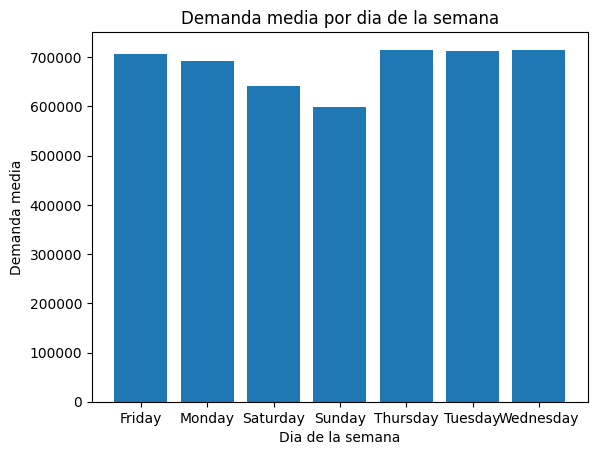

In [89]:
# creamos una grafica de barras con la media de la demanda por dia de la semana con matplotlib
import matplotlib.pyplot as plt

# creamos la grafica de barras
plt.bar(df_semanas.index, df_semanas["mean"])


# agregamos el titulo y el nombre de los ejes 

plt.title("Demanda media por dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Demanda media")


# serie temporal de la demanda nacional

In [91]:
import plotly.express as px


fig = px.line(df, x="fecha", y="demanda", title='Evolución de la demanda', hover_data=["dia_semana"])

fig
